In [15]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
np.set_printoptions(threshold=np.nan)

In [16]:
data = pd.read_csv("../Data/preprocessed_Oppervlakte_STD.csv") 

data = data.drop(['Unnamed: 0.1'], axis=1)
data = data.drop(['Unnamed: 0'], axis=1)
data['Conditie'] = data['Conditie'].map({'norm': 0,  'bril': 1})
data

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Height,Weight,Age,BMI,std_SegmentData,STD
0,006A01',0,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,177,70.0,20,22.343516,0.060870,3.409617
1,006A01',0,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,177,70.0,20,22.343516,0.038465,1.934760
2,006A01',0,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,177,70.0,20,22.343516,0.030903,1.357366
3,006A01',0,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,177,70.0,20,22.343516,0.074751,4.261516
4,009A01',0,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,195,86.0,23,22.616700,0.028861,1.569590
5,009A01',0,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,195,86.0,23,22.616700,0.029494,1.660196
6,009A01',0,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,195,86.0,23,22.616700,0.017266,1.055629
7,009A01',0,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,195,86.0,23,22.616700,0.015360,0.931125
8,010A01',0,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,165,65.0,28,23.875115,0.068683,4.492418
9,010A01',0,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,165,65.0,28,23.875115,0.024063,1.929386


In [20]:
# numpy_matrix = df.as_matrix()
# # X = numpy_matrix[:,[6, 8]]
# X = np.array(numpy_matrix[:,[6, 8]], dtype=float)
# y = np.array(numpy_matrix[:, 1], dtype=int)
# # y = numpy_matrix[:,[1]]
# print(y.size)

numpy_matrix = data.as_matrix()
# X = numpy_matrix[:,[6, 8]]
X = np.array(numpy_matrix[:,[8, 11]], dtype=float)
Y = np.array(numpy_matrix[:, 1], dtype=int)
# y = numpy_matrix[:,[1]]


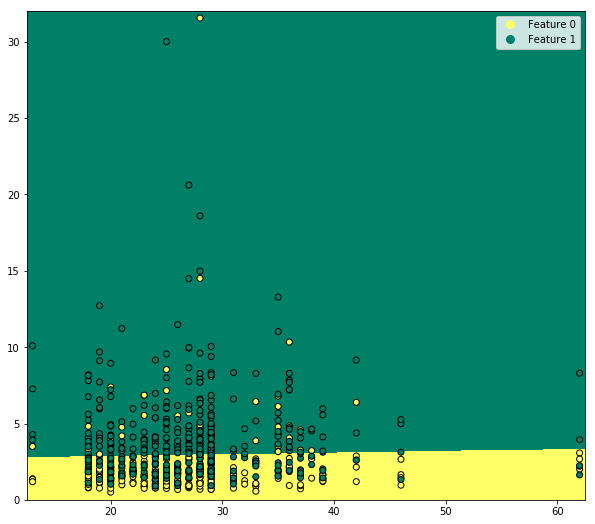

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 9))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.summer_r)

# Plot also the training points
# plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.summer_r)

sc = plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.summer_r)
size=81
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), ms=np.sqrt(size), mec="none",
                        label="Feature {:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(Y)]
plt.legend(handles=handles)

# plt.xlabel('Age')
# plt.ylabel('BMI')

# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

plt.show()

             precision    recall  f1-score   support

          0       0.63      0.62      0.62        99
          1       0.68      0.69      0.69       117

avg / total       0.66      0.66      0.66       216

0.6574074074074074


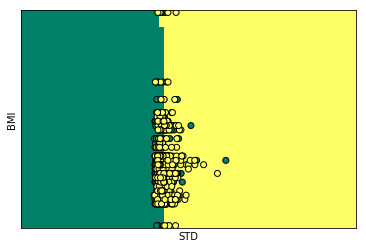

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# import some data to play with
# iris = datasets.load_iris()
# X = iris.data[:, :2]  # we only take the first two features.
# Y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.summer_r)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.summer_r)
plt.xlabel('STD')
plt.ylabel('BMI')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()


In [7]:
import matplotlib.cm
# print(matplotlib.cm.cmap_d.keys())

In [8]:
# from sklearn.metrics import classification_report
# print(classification_report(Y,Z))
# from sklearn.metrics import accuracy_score
# accuracy_score(Y, Z)

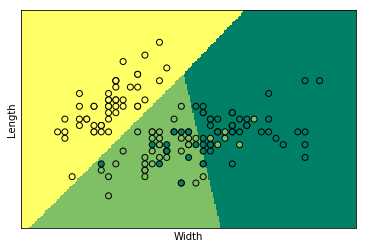

In [9]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')

# Create an instance of Logistic Regression Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.summer_r)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.summer_r)
plt.xlabel('Width')
plt.ylabel('Length')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()